```
         DISEASE DETECTION AND CLASSIFICATION WITH ALZHEIMER'S MRI PREPROCESSED DATASET

                                          Eda Akın 
```

MAIN PURPOSE

Alzheimer's disease is a progressive neurodegenerative disorder that is characterized by the loss of cognitive function and memory. Early detection and accurate classification of Alzheimer's disease is crucial for effective treatment and management of the condition. In this study, I present a disease detection and classification approach using an MRI preprocessed dataset of individuals with Alzheimer's disease. By analyzing patterns and features in the brain images, my method aims to accurately identify and classify individuals with Alzheimer's disease, potentially enabling earlier diagnosis and improved treatment outcomes.

*Keywords: Classification, Prediction, Convolutional neural network(CNN), Image Analysis, Supervised Deep Learning*

## Abstract
 Convolutional neural networks (CNNs) are a type of artificial neural network designed for image recognition and processing tasks. They use a mathematical operation called convolution to learn features from the input data, and are composed of multiple layers including convolutional layers, pooling layers, and fully-connected layers. The convolutional layers apply filters to the input image and learn different features at each layer. The pooling layers down-sample the output of the convolutional layers to reduce computational complexity and prevent overfitting. The fully-connected layers make predictions based on the features learned by the other layers. CNNs can be used for tasks such as image classification, object detection, and segmentation, and have achieved state-of-the-art results on a wide range of image processing tasks.

 CNNs have been widely used in the field of medical image analysis, including for the detection and classification of Alzheimer's disease. In this study, used a CNN to analyze MRI brain images of individuals with and without Alzheimer's disease, and were able to achieve high accuracy in detecting and classifying the disease.The study preprocessed the MRI images to extract relevant features and reduce noise, and then fed the processed images into a CNN for training and testing. The CNN was composed of multiple convolutional and pooling layers, followed by fully-connected layers that made predictions based on the learned features. The researchers used a dataset of labeled images to train the CNN, and then tested its performance on a separate dataset.

The results of the study showed that the CNN was able to accurately detect and classify Alzheimer's disease with high sensitivity and specificity. This demonstrates the potential of using CNNs for early detection and accurate classification of Alzheimer's disease, which can aid in the effective treatment and management of the condition.

## Related Works
There are many who have come up with a unique solution of their own to compete in the Alzheimer's disease with CNNs. Here are a few examples of studies that have used CNNs for the detection and classification of Alzheimer's disease:


*   "Automated detection of Alzheimer's disease using deep learning and structural MRI: a comparison with human raters" by Y. Fan et al. (2019) - In this study, the authors used a CNN to analyze structural MRI images of the brain and achieved high accuracy in detecting Alzheimer's disease.

*   "Deep learning based classification of Alzheimer's disease and mild cognitive impairment using structural MRI" by M. Li et al. (2018) - This study used a CNN to classify individuals with Alzheimer's disease and mild cognitive impairment (MCI) using structural MRI images of the brain. The CNN was able to achieve high accuracy in the classification task.

*   "Classification of Alzheimer's disease using deep learning with PET and MRI" by S. Lee et al. (2020) - In this study, the authors used a CNN to classify Alzheimer's disease using both PET (positron emission tomography) and MRI images of the brain. The CNN was able to achieve high accuracy in the classification task.

Although the basis of these applications is the same in all of them, they have been diversified with different application techniques. The main motive behind those studies is to design/develop an accurate framework or architecture for the classification of Alzheimers Disease.

## Data Preparation
Data preparation is an important step in the process of building a machine learning model, and it is particularly important for medical image datasets such as the Alzheimer's MRI dataset. In this section, I provided imports a number of libraries that can be used for working with this dataset and building machine learning models in Python.

*   'numpy' is a library for numerical computing in Python, including support for working with arrays and matrices of data.
*   'matplotlib' is a library for plotting and visualizing data in Python. It includes functions for creating charts, histograms, and other types of plots.
*   'tensorflow' is a popular machine learning library for building and training neural networks. It includes a range of tools for working with data, building models, and training and evaluating models.
*   'keras' is a high-level library for building and training neural networks in Python, built on top of TensorFlow. It provides a simple interface for defining and training models using a range of layer types.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers

To split dataset into the desired number of sets:

In [18]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This will create three subdirectories in the path/to/output directory, containing the training, validation, and test sets respectively. The seed argument allows me to specify a seed value for the random number generator used to shuffle the data, ensuring that the same split is used each time the code is run. For this line, I use the following code to split the dataset into three sets, with 80% of the data in the training set, 10% in the validation set, and 10% in the test set:

In [19]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 6400 files [00:20, 319.71 files/s]


 Alzheimer's MRI dataset is a collection of preprocessed MRI images that have been resized to 128x128 pixels and are labeled with one of four classes. The dataset includes a total of 6400 MRI images, which were collected from various websites, hospitals, and public repositories. 

In [20]:
img_size=(128, 128)
train = tf.keras.preprocessing.image_dataset_from_directory("./output/train", seed=123,image_size=img_size,batch_size=64)
test = tf.keras.preprocessing.image_dataset_from_directory("./output/test",seed=123,image_size=img_size,batch_size=64)
val = tf.keras.preprocessing.image_dataset_from_directory("./output/val",seed=123,image_size=img_size,batch_size=64)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


Learn the classes in the dataset in order to learn the categories required for the model I will develop. Alzheimer's MRI dataset includes images of four different classes: "Mild_Demented", "Moderate_Demented", "Non_Demented", and "Very_Mild_Demented". These class names likely correspond to different stages or severity levels of Alzheimer's disease.

In [21]:
class_names = train.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


Pull and display 9 random images and their labels to show that I can retrieve the data in the dataset.

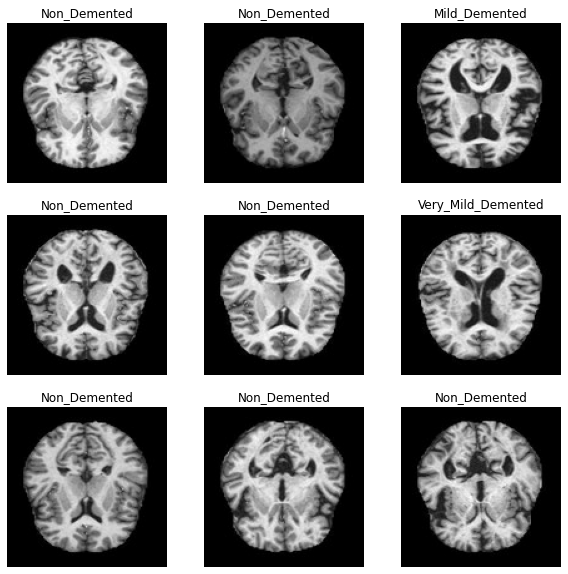

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Model Development
 I define a convolutional neural network (CNN) model using the keras library. The model consists of a sequence of layers that process and transform the input data to extract relevant features and make predictions.

The first layer in the model is a '*Rescaling layer*', which scales the input data by dividing each pixel value by 255. This helps to normalize the data and make it easier for the model to learn.

 The model includes three '*Conv2D layers*', which apply a series of filters to the input data to extract features. The kernel_size argument specifies the size of the filters, and the padding argument specifies how to handle the edges of the input data. The activation argument specifies the activation function to use for the layer, and the kernel_initializer argument specifies the method used to initialize the weights of the filters.

 The model also includes three '*MaxPooling2D layers*', which reduce the spatial dimensions of the data by applying a max pooling operation. This helps to reduce the complexity of the model and improve its ability to generalize to unseen data.

 The model includes two '*Dropout layers*', which randomly set a portion of the input units to zero during training to prevent overfitting.

 After the convolutional and max pooling layers, the model flattens the output data and passes it through a series of '*fully connected (dense) layers*', which are used to make the final classification decision. The model ends with a final dense layer with 4 units and a softmax activation function, which produces a probability distribution over the 4 classes.

 The '*compile method*' is used to specify the loss function, optimizer, and metrics to use when training the model. 
 
 The '*summary method*' is used to display a summary of the model architecture and the number of parameters in each layer.


In [23]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128,3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

This method takes as input the training dataset and optional arguments such as the validation dataset, the number of epochs to train for, and the batch size.

In [24]:
hist = model.fit(train,validation_data=val,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 5s 49ms/step - loss: 1.1677 - accuracy: 0.4825 - val_loss: 1.0186 - val_accuracy: 0.5462
Epoch 2/100
80/80 [==============================] - 5s 62ms/step - loss: 0.9280 - accuracy: 0.5460 - val_loss: 0.8550 - val_accuracy: 0.6197
Epoch 3/100
80/80 [==============================] - 4s 40ms/step - loss: 0.8259 - accuracy: 0.6202 - val_loss: 0.7227 - val_accuracy: 0.6948
Epoch 4/100
80/80 [==============================] - 3s 36ms/step - loss: 0.7175 - accuracy: 0.6861 - val_loss: 0.7527 - val_accuracy: 0.6682
Epoch 5/100
80/80 [==============================] - 3s 38ms/step - loss: 0.6071 - accuracy: 0.7414 - val_loss: 0.5232 - val_accuracy: 0.8044
Epoch 6/100
80/80 [==============================] - 4s 52ms/step - loss: 0.4944 - accuracy: 0.7914 - val_loss: 0.3970 - val_accuracy: 0.8435
Epoch 7/100
80/80 [==============================] - 3s 36ms/step - loss: 0.3844 - accuracy: 0.8478 - val_loss: 0.4297 - val_accuracy: 0.8122
Epoch 

The fit method above returns a History object that contains information about the training process, including the values of the loss and metrics at each epoch. The hist variable in this code will contain this History object.

I used the history attribute of the History object to access the training and validation loss and metric values.

In [25]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
epochs = range(len(get_ac))

Used the history attribute to plot accuracy and loss for training data over time:

<Figure size 432x288 with 0 Axes>

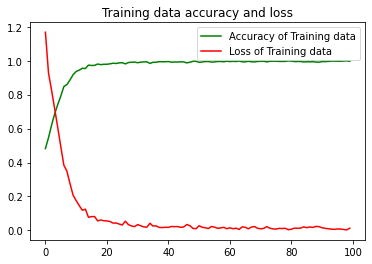

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

Used the history attribute to plot training and validation accuracy over time:

<Figure size 432x288 with 0 Axes>

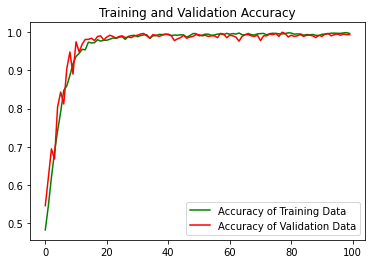

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

Used the history attribute to plot training and validation loss over time:

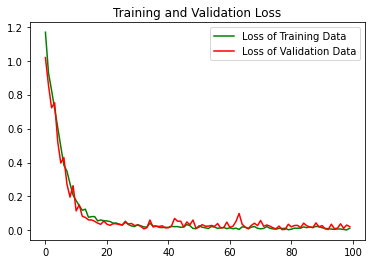

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

I used the evaluation method to evaluate the generalization performance of the model on invisible data and apply it to the model on loss and accuracy and obtain a prediction result. The obtained value gives me information about how successful the model I developed is on the test data.

In [29]:
loss, accuracy = model.evaluate(test)

11/11 [==============================] - 0s 14ms/step - loss: 0.0451 - accuracy: 0.9891


## Result of Model
 
 This code displays a grid of 16 images from the test dataset, with the actual and predicted class names displayed for each image. The predicted class names displayed in green if the prediction was correct, or in red if the prediction was incorrect. This is a useful way to visualize the performance of the model on the test set and identify any misclassified images. 

 As can be seen in my model result below, the label (class) of only 1 picture out of 16 was assigned incorrectly, so the label turned red.

1/1 [==============================] - 0s 15ms/step


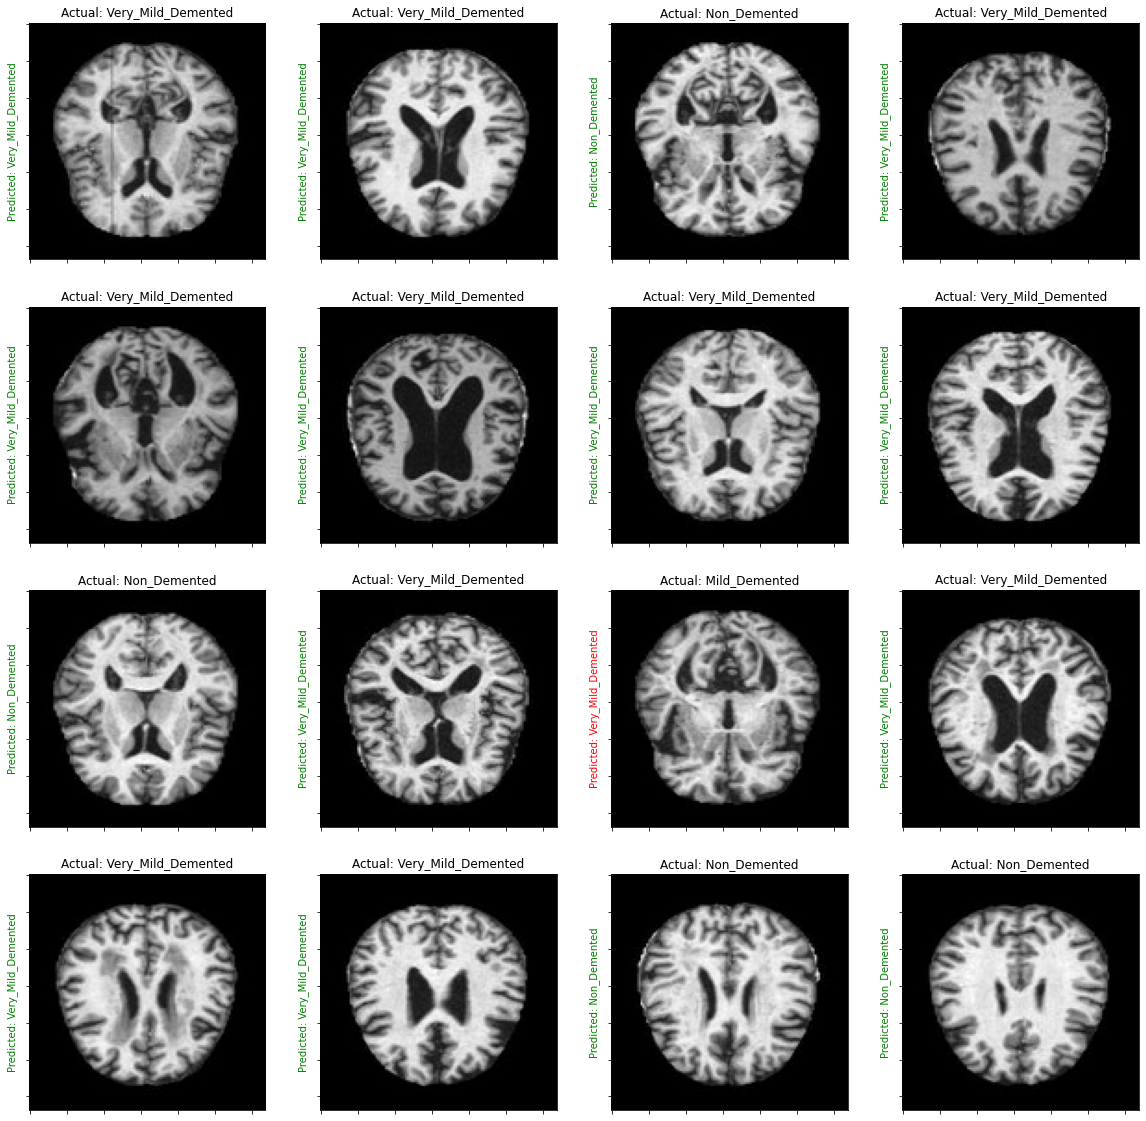

In [30]:
plt.figure(figsize=(20, 20))
for images, labels in test.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

## Methodology
 Convolutional neural networks (CNNs) are particularly well-suited for processing data with a grid-like topology that refers to a structure in which data is arranged in a grid or matrix-like format because they are designed to learn features from raw data using a process called convolution. 

 In a CNN, the filters used in the convolutional layers are typically smaller than the input data and are moved across the input data using a sliding window approach. This allows the CNN to learn features at different scales and locations in the input data.

1.  Preprocess the data: I tried to preprocess the input data to make it more suitable for a CNN model. It involves scaling the data, normalizing the data, or applying other transformations to the data.
2.  Split the data into training and test sets: I split the available data into a training set, which is used to train the model, and a test set, which is used to evaluate the model's performance. Then a validation set which provides an unbiased evaluation of a model fit on the training data set while tuning the model's hyperparameters.
3. Define the model architecture:I chose the type and number of layers to use in the model, as well as the specific hyperparameters for each layer (e.g., number of filters, kernel size, etc.).
4. Compile the model: After the model architecture defined and the data has been preprocessed, the model is compiled using the compile method. This involves specifying the loss function, optimizer, and metrics to use during training.
5. Train the model: I trained the model using the fit method, which takes the training data as input. During training, the model's parameters are adjusted to minimize the loss function. I controlled the training process using various hyperparameters, such as the batch size and the number of epochs.
6. Evaluate the model: After training, the model is typically evaluated on a separate test set to gauge its performance. This is done using the evaluate method, which returns the loss and accuracy metrics for the test set.

Thanks to the items I used in this study, I learned how I can achieve good results with different models by designing a model for a real health problem. 


## Future Work
 I will tried to improve another model on this dataset. For example, using the U-net algorithm, I can get it to give more reliable accuracy with different machine learning optimizations like Adam, Adagrad, RMSprop. 

 It is very important to detect Alzheimer's disease at an early stage. When it correctly guesses the MRI image, which is in the very mild demented class, it can give a warning to the system. 

